In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df_pca_kmeans = pd.read_csv("pca7_cluster5_2.csv")
data = pd.read_csv("data_clustering.csv",index_col=0)
ncluster=5

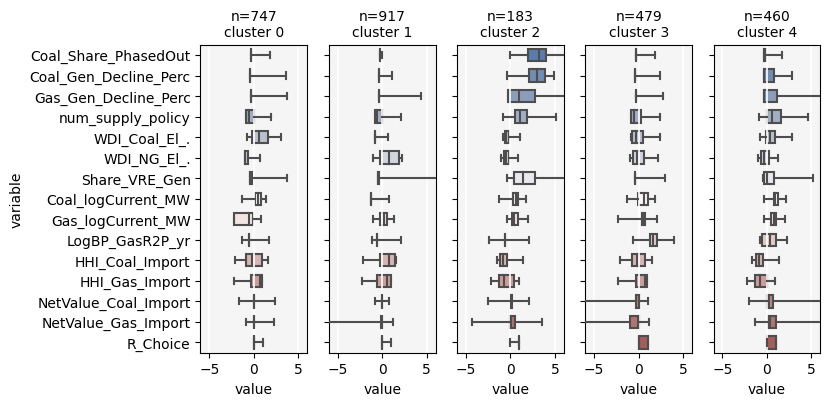

In [30]:
melted_kmeans = pd.melt(df_pca_kmeans, id_vars=["Segment K-means PCA"], value_vars=data.columns)#'Unnamed: 0'
fig, axes = plt.subplots(1,ncluster,figsize = (8,4))
for num in np.arange(ncluster):
    axes[num].set_facecolor('whitesmoke')
    axes[num].grid(which='major', color='white', linewidth=1.2,zorder=-10)
    axes[num].set_xticks([-10,-5,0,5,10])
    sns.boxplot(melted_kmeans.query("`Segment K-means PCA`==@num").drop(columns="Segment K-means PCA"), x="value", y="variable", 
       width=.6, whis=(0, 100),palette="vlag",ax=axes[num],zorder=20)
    num_obs = len(df_pca_kmeans.query("`Segment K-means PCA`==@num"))
    if num!=0:
        axes[num].set_yticklabels([])
        axes[num].set_ylabel("")
    #axes[num].set_xlim([-12,12])
    axes[num].set_xlim([-6,6])
    axes[num].set_title("n="+str(num_obs)+"\ncluster "+str(num),fontsize=10)
fig.savefig("cluster_variables.png",dpi=600, bbox_inches='tight')

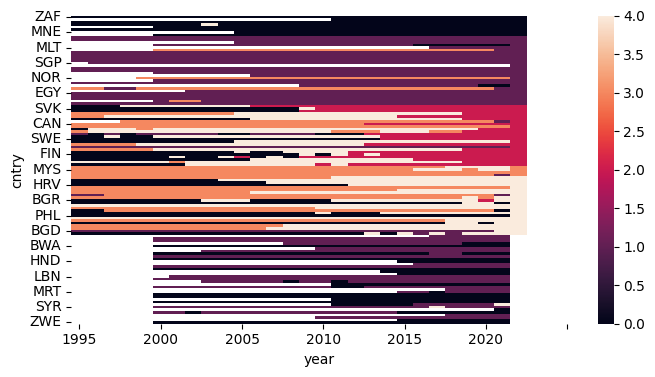

In [29]:
fig, axes = plt.subplots(figsize = (8,4))
pivot_heatmap = df_pca_kmeans.pivot(index='cntry', columns='year', values='Segment K-means PCA')
pivot_heatmap = pivot_heatmap.sort_values(by=2022)
sns.heatmap(pivot_heatmap)
plt.xticks(np.arange(7)*5+0.5,rotation=0)
fig.savefig("cluster_heatmap_all.png",dpi=600, bbox_inches='tight')

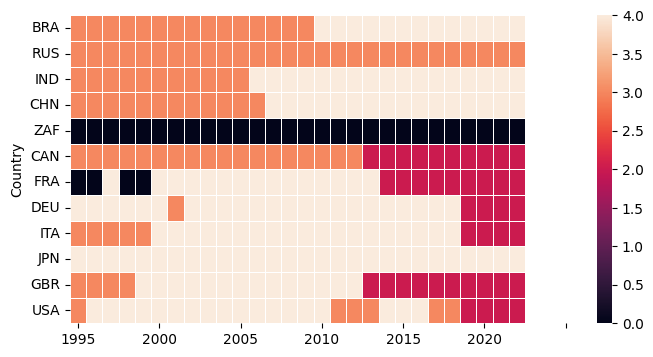

In [31]:
BRICS_list = ["BRA","RUS","IND","CHN","ZAF"]
G7_list = ["CAN","FRA","DEU","ITA","JPN","GBR","USA"]
long_list = BRICS_list+G7_list
fig, axes = plt.subplots(figsize = (8,4))
sns.heatmap(pivot_heatmap.loc[long_list],linecolor="white",linewidths=0.5,ax=axes)
plt.xticks(np.arange(7)*5+0.5,rotation=0)
axes.set_ylabel("Country")
axes.set_xlabel(None)
fig.savefig("cluster_heatmap_BRICS_G7.png",dpi=600, bbox_inches='tight')